In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [254]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/spo2 vs r-r values/1000-2000.csv")

In [255]:
df.head(1000)

,SpO2,rrvalues
0,95.2974,0.780
1,95.2983,0.782
2,95.2970,0.795
3,95.2979,0.792
4,95.2981,0.813
...,...,...
995,92.2866,0.781
996,92.2849,0.791
997,92.2864,0.749
998,92.2868,0.693


In [256]:
df.describe()

,SpO2,rrvalues
count,1000.000000,1000.000000
mean,95.869903,0.785401
std,1.437070,0.038255
min,92.284900,0.650000
25%,95.297700,0.762000
50%,96.997000,0.786000
75%,96.998300,0.811000
max,96.999400,0.885000


In [257]:
df.shape

(1000, 2)

In [258]:
cdf = df[['SpO2','rrvalues']]
cdf.head(5)

,SpO2,rrvalues
0,95.2974,0.780
1,95.2983,0.782
2,95.2970,0.795
3,95.2979,0.792
4,95.2981,0.813


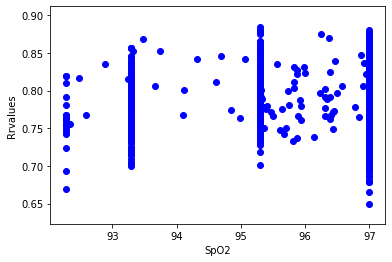

In [259]:
#graph of SNO vs r-r values

plt.scatter(cdf.SpO2, cdf.rrvalues,color='blue')
plt.xlabel('SpO2')
plt.ylabel('Rrvalues')
plt.show()

In [260]:
#splitting our data in 80-20 ratio for regression

In [261]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

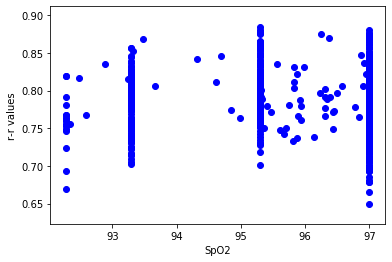

In [262]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.xlabel("SpO2")
plt.ylabel("r-r values")
plt.show()

In [263]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00015438]]
Intercept:  [0.77060923]


Text(0, 0.5, 'r-r values')

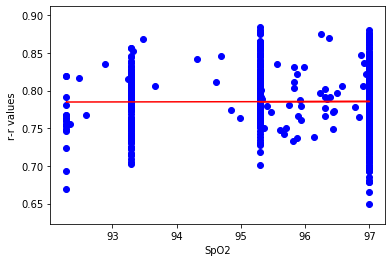

In [264]:
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SpO2")
plt.ylabel("r-r values")

In [265]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -30077.31


In [266]:
#using polynomial regression

In [267]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 9.52974000e+01, 9.08159445e+03],
       [1.00000000e+00, 9.52983000e+01, 9.08176598e+03],
       [1.00000000e+00, 9.52970000e+01, 9.08151821e+03],
       ...,
       [1.00000000e+00, 9.22864000e+01, 8.51677962e+03],
       [1.00000000e+00, 9.22868000e+01, 8.51685345e+03],
       [1.00000000e+00, 9.22862000e+01, 8.51674271e+03]])

In [268]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.65205063 -0.00342513]]
Intercept:  [-30.23883942]


Text(0, 0.5, 'r-rvalues')

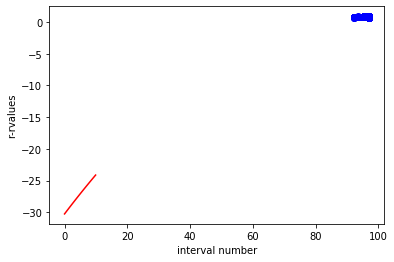

In [269]:
#plotting the polynomial regression
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [270]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -39.96
